# Leon Data Exploration  
Here, I will perform EDA on the lab, microbiology, and prescription tables.  

lab_events and lab_item: lab test done on the patient. 

# Libraries

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import sweetviz as sv

pd.DataFrame.iteritems = pd.DataFrame.items

In [36]:
def plot_vertical_categorical_data(column_name, df, top_n):
    df_counts = df[column_name].value_counts()
    top_X = df_counts.head(top_n)
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_X.index, y=top_X.values)
    plt.title('Top '+str(top_n)+' Most Common ' + column_name)
    plt.xlabel(column_name)
    plt.ylabel('Number of Admissions')
    plt.xticks(rotation=45, ha='right')  # Rotate the diagnosis names for better readability
    plt.tight_layout()
    plt.show()

def plot_horizontal_categorical_data(column_name, df, top_n):
    df_counts = df[column_name].value_counts()
    top_X = df_counts.head(top_n)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_X.values, y=top_X.index)
    plt.title('Top '+str(top_n)+' Most Common ' + column_name)
    plt.ylabel(column_name)
    plt.xlabel('Number of Admissions')
    # You might not need rotation for y-axis labels, but if you do, adjust accordingly
    # plt.yticks(rotation=45, va='center')  
    plt.tight_layout()
    plt.show()


# Micro

In [38]:
micro = pd.read_csv('/Deep Learning/capstone_project/Data/MICROBIOLOGYEVENTS.csv')
micro.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,749,96,170324,2156-04-21 00:00:00,2156-04-21 14:00:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,750,101,175533,2196-09-26 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,751,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,752,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,753,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
m2 = micro[['HADM_ID', 'ORG_NAME']]

In [40]:
# one-hot encode 
df_one_hot = pd.get_dummies(m2, columns=['ORG_NAME'])
grouped = df_one_hot.groupby('HADM_ID').sum().reset_index()
grouped[grouped['HADM_ID'] == 170324]

,HADM_ID,ORG_NAME_2ND ISOLATE,ORG_NAME_ABIOTROPHIA/GRANULICATELLA SPECIES,ORG_NAME_ACHROMOBACTER (ALCALIGENES) DENTRIFICANS,ORG_NAME_ACHROMOBACTER (ALCALIGENES) XYLOSOXIDANS SS DENTRIFICANS,ORG_NAME_ACIDFAST BACILLI,ORG_NAME_ACINETOBACTER BAUMANNII,ORG_NAME_ACINETOBACTER BAUMANNII COMPLEX,ORG_NAME_ACINETOBACTER SP.,ORG_NAME_ACREMONIUM SPECIES,...,ORG_NAME_TRICHOSPORON ASAHII,ORG_NAME_VARICELLA-ZOSTER VIRUS,ORG_NAME_VEILLONELLA SPECIES,ORG_NAME_VERTICILLIUM SP.,ORG_NAME_VIBRIO SPECIES,ORG_NAME_VIRIDANS STREPTOCOCCI,ORG_NAME_VIRUS,ORG_NAME_YEAST,"ORG_NAME_YEAST, PRESUMPTIVELY NOT C. ALBICANS",ORG_NAME_ZYGOMYCETES
34304,170324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
grouped = df_one_hot.groupby('HADM_ID').sum().reset_index()

In [42]:
grouped.head(50)

,HADM_ID,ORG_NAME_2ND ISOLATE,ORG_NAME_ABIOTROPHIA/GRANULICATELLA SPECIES,ORG_NAME_ACHROMOBACTER (ALCALIGENES) DENTRIFICANS,ORG_NAME_ACHROMOBACTER (ALCALIGENES) XYLOSOXIDANS SS DENTRIFICANS,ORG_NAME_ACIDFAST BACILLI,ORG_NAME_ACINETOBACTER BAUMANNII,ORG_NAME_ACINETOBACTER BAUMANNII COMPLEX,ORG_NAME_ACINETOBACTER SP.,ORG_NAME_ACREMONIUM SPECIES,...,ORG_NAME_TRICHOSPORON ASAHII,ORG_NAME_VARICELLA-ZOSTER VIRUS,ORG_NAME_VEILLONELLA SPECIES,ORG_NAME_VERTICILLIUM SP.,ORG_NAME_VIBRIO SPECIES,ORG_NAME_VIRIDANS STREPTOCOCCI,ORG_NAME_VIRUS,ORG_NAME_YEAST,"ORG_NAME_YEAST, PRESUMPTIVELY NOT C. ALBICANS",ORG_NAME_ZYGOMYCETES
0,100001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,100011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,100012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,100016,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,100018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,100020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [36]:
micro.shape

(631726, 16)

In [37]:
unique_micro = micro['ISOLATE_NUM'].value_counts()
unique_micro

ISOLATE_NUM
1.0    298756
2.0     26458
3.0      2454
4.0       330
5.0        17
6.0         1
Name: count, dtype: int64

In [41]:
unique_micro = micro['AB_NAME'].value_counts()
unique_micro

AB_NAME
GENTAMICIN              25770
LEVOFLOXACIN            18652
CEFTAZIDIME             14640
TOBRAMYCIN              14504
TRIMETHOPRIM/SULFA      14105
CEFEPIME                13465
MEROPENEM               12982
VANCOMYCIN              12915
OXACILLIN               12201
CIPROFLOXACIN           12023
PIPERACILLIN/TAZO       11549
ERYTHROMYCIN            11060
CEFTRIAXONE             10865
AMPICILLIN               9547
TETRACYCLINE             9165
PENICILLIN               9156
CLINDAMYCIN              8760
AMPICILLIN/SULBACTAM     8150
PIPERACILLIN             7836
CEFAZOLIN                7812
RIFAMPIN                 7130
NITROFURANTOIN           6428
IMIPENEM                 5990
CEFUROXIME               5527
PENICILLIN G             1905
LINEZOLID                1425
AMIKACIN                  946
CHLORAMPHENICOL           878
DAPTOMYCIN                445
CEFPODOXIME                 3
Name: count, dtype: int64

In [42]:
unique_micro = micro['DILUTION_TEXT'].value_counts()
unique_micro

DILUTION_TEXT
<=1       69596
<=0.25    26756
=>8       20986
<=0.5     20708
<=4       16306
=>4       12259
2         11285
4         11016
=>16       9647
=>32       9113
8          8916
=>0.5      7217
=>64       7165
<=2        6913
16         4870
1          4075
<=16       3909
0.5        3081
32         2941
=>128      2300
0.25       2066
<=0.12     1981
64         1717
128         514
<=8         410
256         351
<=0.06      298
=>2         177
<=0.03      174
>256        172
0.12        119
0.06         86
=>1          49
<=20         49
=>512        37
=>320        25
0.03         20
<=32         10
40            7
<=10          7
3             6
1.5           6
=>256         5
6             2
20            1
1.0           1
160           1
Name: count, dtype: int64

In [25]:
micro.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
CHARTDATE                   0
CHARTTIME               41772
SPEC_ITEMID                79
SPEC_TYPE_DESC              0
ORG_ITEMID             304845
ORG_NAME               303710
ISOLATE_NUM            303710
AB_ITEMID              355892
AB_NAME                355892
DILUTION_TEXT          364376
DILUTION_COMPARISON    364548
DILUTION_VALUE         364548
INTERPRETATION         355892
dtype: int64

In [34]:
unique_micro = micro['ORG_NAME'].value_counts()
unique_micro

ORG_NAME
STAPH AUREUS COAG +                           63947
ESCHERICHIA COLI                              60133
STAPHYLOCOCCUS, COAGULASE NEGATIVE            32777
KLEBSIELLA PNEUMONIAE                         30628
PSEUDOMONAS AERUGINOSA                        28926
                                              ...  
CORYNEBACTERIUM JEIKEIUM (C.D.C. GROUP JK)        1
ENTAMOEBA HISTOLYTICA/DISPAR                      1
SLACKIA EXIGUA                                    1
LACTOBACILLUS CASEI                               1
STREPTOCOCCUS MUTANS                              1
Name: count, Length: 362, dtype: int64

In [22]:
micro.fillna('Missing', inplace=True)

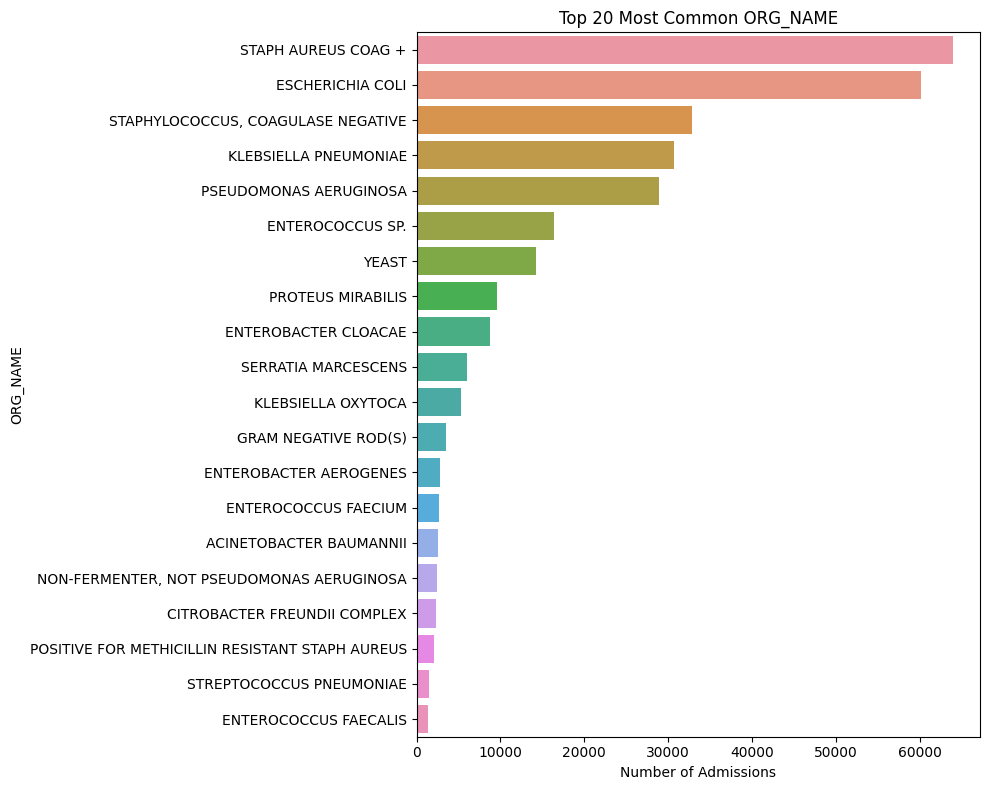

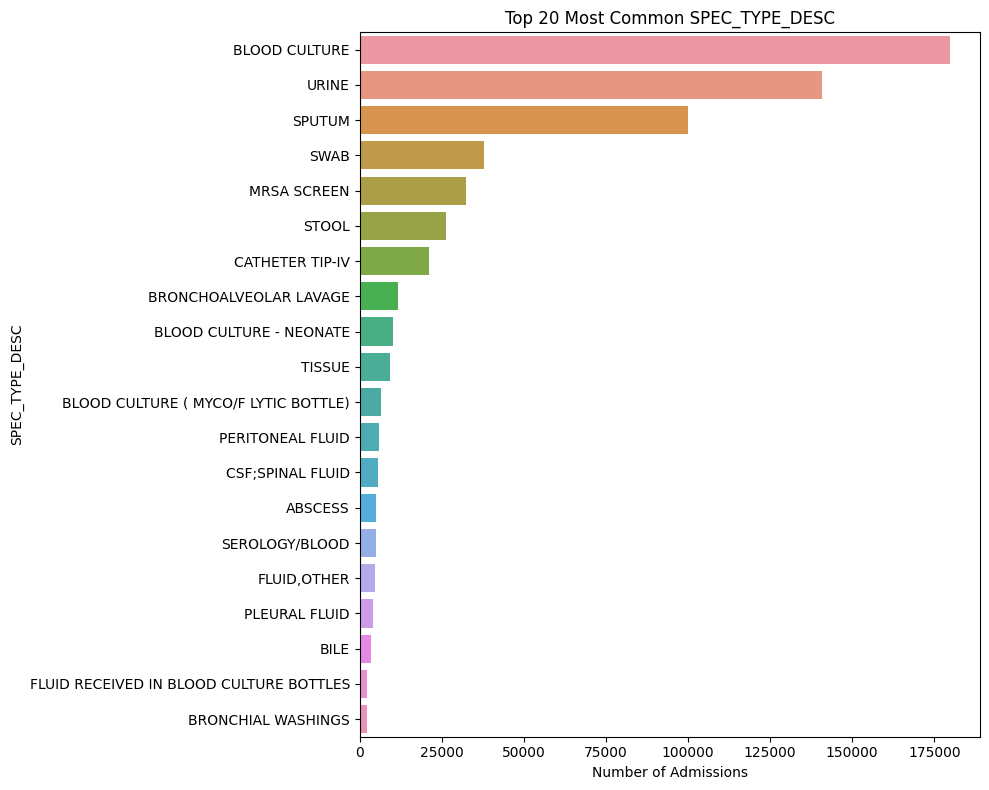

In [26]:
plot_horizontal_categorical_data('ORG_NAME', df=micro, top_n=20)
plot_horizontal_categorical_data('SPEC_TYPE_DESC', df=micro, top_n=20)

# Load in Dataframes

# Lab Info

In [ ]:
lab_items = pd.read_csv('/Deep Learning/capstone_project/Data/D_LABITEMS.csv')       # 44K
lab_event = pd.read_csv('/Deep Learning/capstone_project/Data/LABEVENTS.csv')       # 1.8G

In [ ]:
# Merge lab_event with lab_item using a left merge
lab_merged = pd.merge(lab_event, lab_item, on='ITEMID', how='left')
lab_merged

In [97]:
lab_items

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


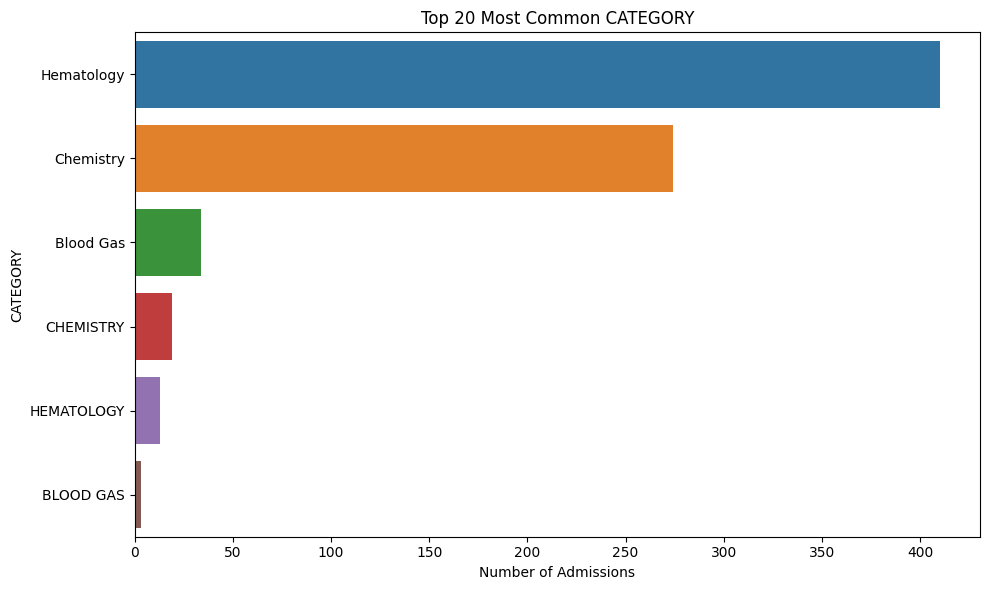

In [99]:
plot_horizontal_categorical_data('CATEGORY', df=lab_items, top_n=20)
#plot_horizontal_categorical_data('SPEC_TYPE_DESC', df=micro, top_n=20)

In [100]:
# Merge lab_event with lab_item using a left merge
lab_merged = pd.merge(lab_event, lab_item, on='ITEMID', how='left')
lab_merged

NameError: name 'lab_event' is not defined

# Medications  

Three tables contain information on medication:  
1) PRESCRIPTIONS
2) INPUTEVENTS_CV
3) INPUTEVENTS_MV

## Prescriptions  

Medication related order entries. 
Drug names, NDC code (11digit version).  
- National Drug Code (NDC) is originally 10-digit, 3 segment numeric identifier.

One hot encode for each drug with the drug concentration as the value.  

In [7]:
prescriptions = pd.read_csv('/Deep Learning/capstone_project/Data/PRESCRIPTIONS.csv', low_memory=False) 

In [8]:
prescription

NameError: name 'prescription' is not defined

In [8]:
prescriptions.isnull().sum()

ROW_ID                     0
SUBJECT_ID                 0
HADM_ID                    0
ICUSTAY_ID           1447708
STARTDATE               3182
ENDDATE                 5421
DRUG_TYPE                  0
DRUG                       0
DRUG_NAME_POE        1664234
DRUG_NAME_GENERIC    1662989
FORMULARY_DRUG_CD       1933
GSN                   507164
NDC                     4463
PROD_STRENGTH           1362
DOSE_VAL_RX             1350
DOSE_UNIT_RX            1342
FORM_VAL_DISP           1355
FORM_UNIT_DISP          1409
ROUTE                   1156
dtype: int64

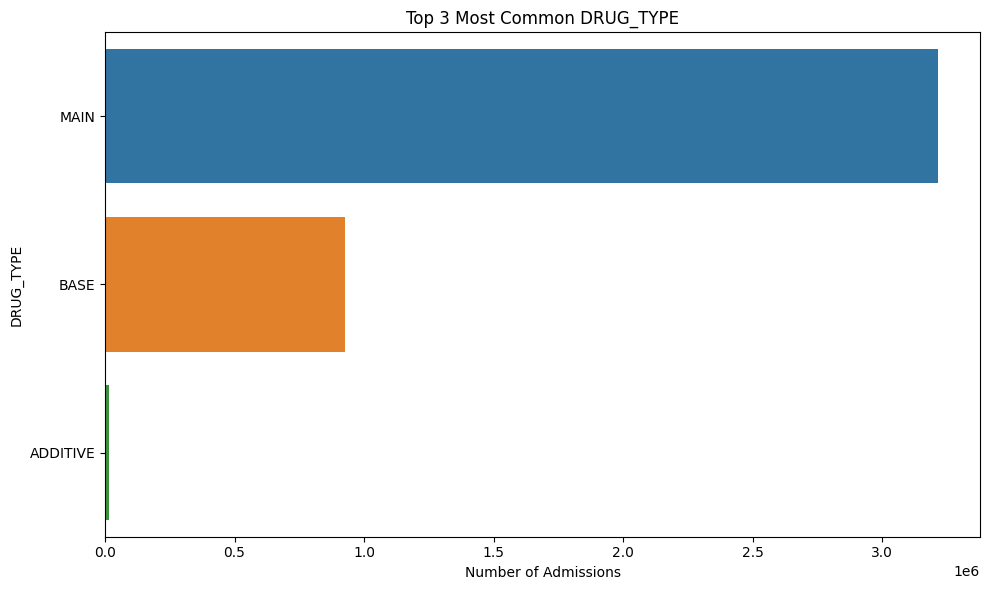

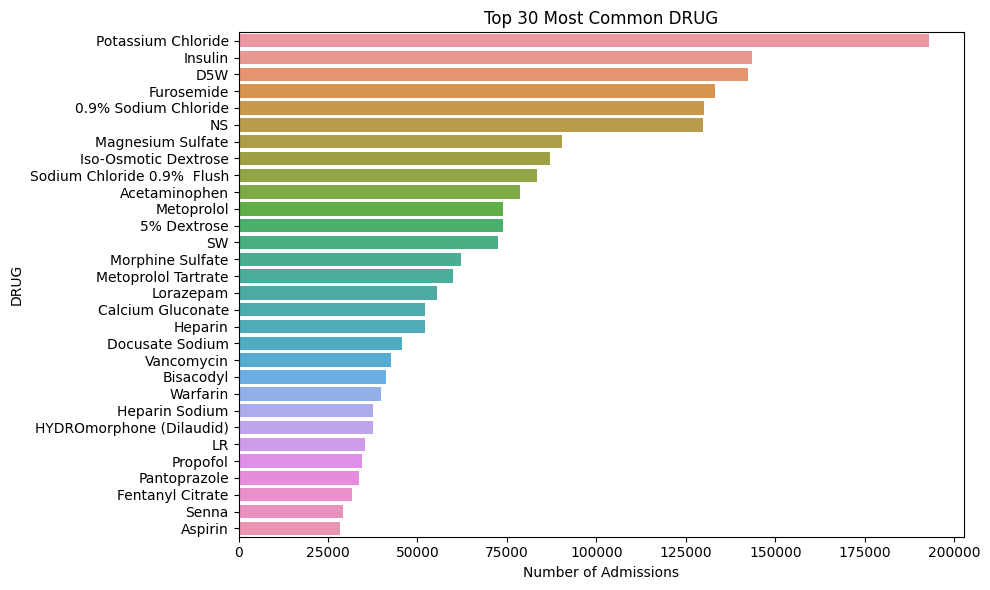

In [15]:
plot_horizontal_categorical_data('DRUG_TYPE', df=prescriptions, top_n=3)
plot_horizontal_categorical_data('DRUG', df=prescriptions, top_n=30)